
Your task: 

the following function will return the three variables x, y, and f. For/with these variables...

    1.Visualise (x, y) as a scatterplot using the matplotlib.pyplot module.
    2.Create a regular grid x_test with 100 values (sorted in ascending order) which must cover the exact same range as x.
    3.Visualise (x_test, f(x_test)) using a solid line plot in the same panel as the above scatterplot.
    4.Perform a (or more) polynomial regression on (x, y) using the numpy library to obtain a suitable polynomial function p.
    5.Compare (x_test, f(x_test)) and (x_test, p(x_test)) visually in a new matplotlib.pyplot figure.
    6.Split the data (x, y) into two disjunct sets (x_train, y_train), (x_validate, y_validate), where the training set contains ≈80 of the original data and the validation set the rest.
    7.Design and train a neural network (pytorch or tensorflow) using training/validation split.
    8.Visualize the training and validation loss convergence using a matplotlib.pyplot figure.
    9.Obtain the network's prediction for the input data x_test and visually compare this prediction with (x_test, f(x_test)) using a matplotlib.pyplot figure.

def gen_data_0(length=5000):
    x = 2.0 * (np.random.rand(length) - 0.5) * 5.0
    f = lambda x: np.exp(np.cos(x))
    y = f(x) + np.random.randn(len(x)) * 0.5
    return x, y, f

In [3]:
def gen_data_0(length=5000):
    x = 2.0 * (np.random.rand(length) - 0.5) * 5.0
    f = lambda x: np.exp(np.cos(x))
    y = f(x) + np.random.randn(len(x)) * 0.5
    
    return x, y, f

In [4]:
import numpy as np
import matplotlib.pyplot as plt
x, y, f = gen_data_0()

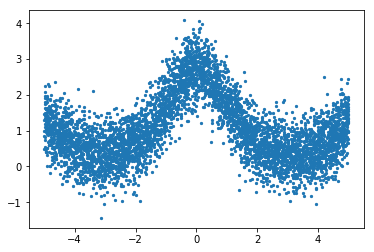

In [5]:
plt.scatter(x,y, s = 5)
plt.show()

In [6]:
np.size(x), np.size(y)

(5000, 5000)

In [7]:
print(min(x), max(x))
x_sorted = np.sort(x)

x_test = x_sorted[::50]
print(x_test)
len(x_test)

-4.997941922486307 4.997086408587541
[-4.99794192 -4.90449561 -4.79781816 -4.70597819 -4.6164704  -4.48710807
 -4.39732717 -4.30857708 -4.21548158 -4.10452266 -3.97447924 -3.86902207
 -3.74037798 -3.65461346 -3.54961163 -3.44811359 -3.35118158 -3.22551696
 -3.12865236 -3.01967197 -2.92042896 -2.81667327 -2.70909261 -2.60617634
 -2.51920868 -2.42033013 -2.32864716 -2.22959533 -2.13036252 -2.0504582
 -1.95333886 -1.85331856 -1.75918207 -1.66676674 -1.58279269 -1.46790301
 -1.35662674 -1.25514546 -1.15849793 -1.06790628 -0.97384706 -0.86200604
 -0.76108693 -0.66937079 -0.57586665 -0.47497707 -0.38806373 -0.31202074
 -0.21334292 -0.12103899 -0.02903558  0.07346658  0.18310322  0.27943901
  0.39388159  0.51074286  0.62208905  0.71051763  0.80367448  0.92493444
  1.0281449   1.1256786   1.23120212  1.33697274  1.43971015  1.55089155
  1.63535104  1.73921361  1.85331268  1.94639976  2.05636008  2.16680459
  2.25656318  2.35796112  2.45556434  2.56459693  2.6405125   2.75745843
  2.86060004  2

100

/home/gaini/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


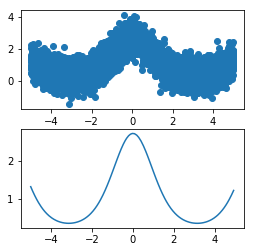

In [8]:
fig, ax = plt.subplots(2, figsize = (4,4))
ax[0].scatter(x, y, label = 'Real data')
ax[1].plot(x_test, f(x_test), label = 'Real data')

fig.show()

/home/gaini/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


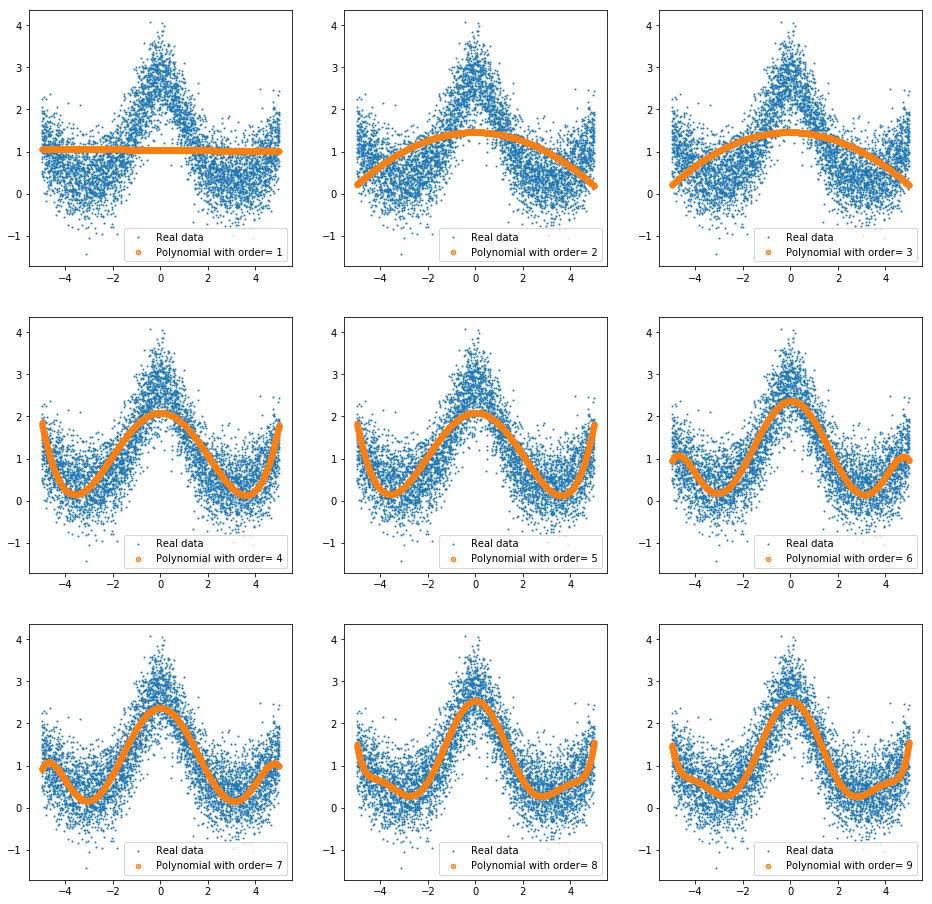

In [9]:
fig, ax = plt.subplots(3, 3, figsize = (16,16))
for n in range(3):
    for k in range(3):
        
        # Calculate a different degree of the polynomial for each plot
        poly_order = 3*n+k+1
        z = np.polyfit(x, y, poly_order)
        p = np.poly1d(z)
        
        # When trying to plot inside an 'axis' object, you can call most of plt. methods on the axes object, and 
        # the results will appear in the axis instead
        ax[n, k].scatter(x, y, s=1,label = 'Real data')
        ax[n, k].scatter(x, p(x), s=2,lw = 4, label = 'Polynomial with order= {}'.format(poly_order))
        ax[n, k].legend()

fig.show()

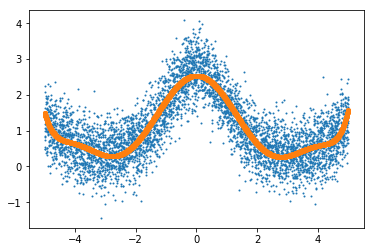

In [10]:
z = np.polyfit(x, y, 9)
p = np.poly1d(z)

plt.scatter(x,y, s =1)
plt.scatter(x,p(x),lw=4, s=1)
plt.show()

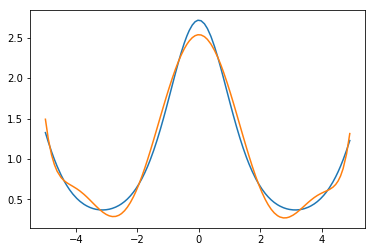

In [11]:
plt.plot(x_test,f(x_test))
plt.plot(x_test,p(x_test))
plt.show()

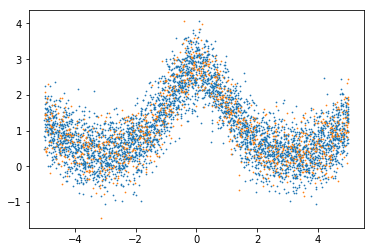

In [12]:


trn = np.random.choice(x.size, int(0.8 * x.size), replace=False)
val = np.setdiff1d(np.arange(x.size), trn, assume_unique=True)

plt.scatter(x[trn], y[trn], s=0.5)
plt.scatter(x[val], y[val], s=0.5)



In [13]:
import torch
inp_trn = torch.autograd.Variable(
    torch.Tensor(x[trn].reshape(-1, 1)))
out_trn = torch.autograd.Variable(
    torch.Tensor(y[trn].reshape(-1, 1)))

print(inp_trn)
print(out_trn)

Variable containing:
-1.4617
 1.4892
 1.3340
   ⋮    
 3.2953
-2.9481
 2.5504
[torch.FloatTensor of size 4000x1]

Variable containing:
 7.1835e-01
 1.4818e+00
 2.3437e+00
     ⋮      
 3.0968e-02
 6.9154e-01
 5.9650e-01
[torch.FloatTensor of size 4000x1]



In [14]:
inp_val = torch.autograd.Variable(
    torch.Tensor(x[val].reshape(-1, 1)),
    volatile=True)
out_val = torch.autograd.Variable(
    torch.Tensor(y[val].reshape(-1, 1)),
    volatile=True)

print(inp_val)
print(out_val)

Variable containing:
 3.5116
-3.4919
-4.4428
   ⋮    
-2.7089
-3.2370
 2.8854
[torch.FloatTensor of size 1000x1]

Variable containing:
 1.3850
 0.5051
 0.8073
   ⋮    
 0.5866
 1.3884
 0.9671
[torch.FloatTensor of size 1000x1]



In [15]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = torch.nn.Linear(1, 10)
        self.layer2 = torch.nn.Linear(10, 30)
        self.layer3 = torch.nn.Linear(30, 50)
        self.layer4 = torch.nn.Linear(50, 30)
        self.layer5 = torch.nn.Linear(30, 10)
        self.layer6 = torch.nn.Linear(10, 1)
        self.activation = torch.nn.LeakyReLU()
    def forward(self, inp):
        x = self.activation(self.layer1(inp))
        x = self.activation(self.layer2(x))
        x = self.activation(self.layer3(x))
        x = self.activation(self.layer4(x))
        x = self.activation(self.layer5(x))
        return self.layer6(x)

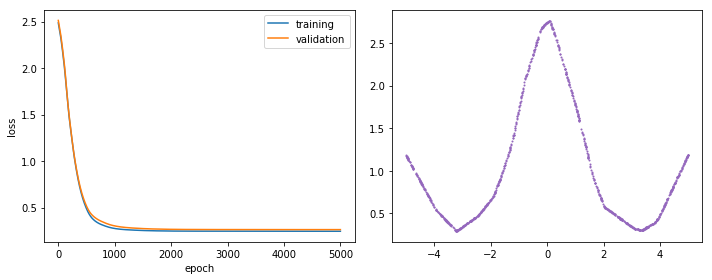

In [16]:
deep_fit = NeuralNetwork()
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adam(deep_fit.parameters(), lr=0.0001)

loss_trn, loss_val = [], []
for _ in range(5000):
    deep_fit.train()
    loss = loss_function(deep_fit(inp_trn), out_trn)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    loss_trn.append(loss.data[0])
    deep_fit.eval()
    loss = loss_function(deep_fit(inp_val), out_val)
    loss_val.append(loss.data[0])

fig, (cnv, prd) = plt.subplots(1, 2, figsize=(10, 4))
cnv.plot(loss_trn, label='training')
cnv.plot(loss_val, label='validation')
cnv.set_xlabel('epoch')
cnv.set_ylabel('loss')
cnv.legend()
prd.scatter(
    inp_val.data.numpy(),
    deep_fit(inp_val).data.numpy(),
    s=1, c='C4')
fig.tight_layout()



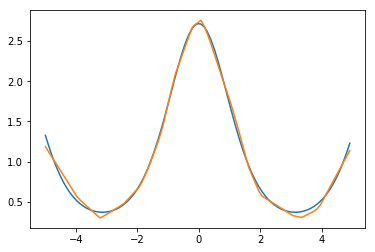

In [24]:
inp_test = torch.autograd.Variable(
    torch.Tensor(x_test.reshape(-1, 1)))


plt.plot(x_test, f(x_test))
plt.plot(x_test, deep_fit(inp_test).data.numpy())


